<b>
BS1819-1617  
Data Structures and Algorithms  
Group Assignment  
</b>

BA1820
15/10/2016
Team 3:
* Ahmad Bilal Aslam 01290213
* Salkha Marie Baraba 01293357
* Johannes Barth 01281291
* Chong Hock Kelvin Goh 01223454
* Christina Lefkothea Tatli 01231953
* Yiu Fong Christopher Ying 00821967


<b><u> Part 1 </u></b>

<b>Stock returns</b>

i. Calculate the daily returns for all stocks in the data. 

* returns_Stocks function calculates the daily returns for all stocks in the data, using Pandas built-in function. Daily returns were also calculated manually, using the returns_Strocks_manual_calc function. Furtheremore, test_returns_Strock_built_in_equals_manual function ensures that the values of the two aforementioned functions are the same. 

In [12]:
import pandas as pd
import numpy as np
import csv
import sys
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering

##### START OF PART 1 - calculate daily returns #####

##~~ KEY VARIABLE: "returns" stores daily returns of stocks

##### To Read company names into a dictionary
def readNamesIntoDict():
    d = dict()
    input_file = csv.DictReader(open("SP_500_firms.csv"))
    for row in input_file:
        #print(row)
        d[row['Symbol']] = [row['Name'],row['Sector']]
    return d

##### To calculate daily returns from stock prices
def returns_Stocks(priceData):      
    # input is a pd.dataframe of stock prices
    # output is a pd.dataframe of daily returns    
    returns = priceData.pct_change()
    # remove index 0 of returns - it's a nan value because the first period data has no daily return
    #returns = returns[1:len(returns)]
    # We had used the built-in function, the next function below is the manual calculation
    return returns

def returns_Stocks_manual_calc(priceData):      
    # Manual calculation of the returns
    returns = priceData / priceData.shift(1) - 1
    # remove index 0 of returns - it's a nan value because the first period data has no daily return
    #returns = returns[1:len(returns)]
    return returns

# make sure that the manual calculation is same as built-in function
def test_returns_Stock_built_in_equals_manual(priceData):  
    returns_built_in = returns_Stocks(priceData)
    returns_manual = returns_Stocks_manual_calc(priceData)
    difference = returns_built_in - returns_manual 
    print("The total difference between built-in and manual way of calculating daily returns, across stocks and time period, is:", difference.sum().sum()) 

##### Several functions to determine which stock has max, min return; which are overall best, worst stocks; and max and min std of daily returns
def max_return(returns, namesDict = readNamesIntoDict()):    
    # input: pd.dataframe of daily returns, and a dictionary of company/sector (call the readNamesIntoDict() function if the dictionary is not passed as an argument)
    # output: returns the maximum daily return along with company name and Sector
    maxDaily_byComp  = returns.max()            #Maximum returns for each company

    maxDaily = maxDaily_byComp.max()            #Overall highest daily return
    maxDaily_CompSym = maxDaily_byComp.idxmax() #Getting index of the maximum return value

    maxDaily_CompName = namesDict[maxDaily_CompSym][0]  #Company Name using its symbol
    maxDaily_Sector = namesDict[maxDaily_CompSym][1]    #Company Sector
    
    return maxDaily_Sector, maxDaily_CompName, maxDaily
    

def min_return (returns, namesDict = readNamesIntoDict()):    
    # input: pd.dataframe of daily returns, and a dictionary of company/sector (call the readNamesIntoDict() function if the dictionary is not passed as an argument)
    # output: returns the minimum daily return along with company name and Sector

    minDaily_byComp  = returns.min()            #Minimum returns for each company

    minDaily = minDaily_byComp.min()            #Overall lowest daily return
    minDaily_CompSym = minDaily_byComp.idxmin() #Getting index of the minimum return value

    minDaily_CompName = namesDict[minDaily_CompSym][0]  #Company Name using its symbol
    minDaily_Sector = namesDict[minDaily_CompSym][1]    #Company Sector
    
    return minDaily_Sector, minDaily_CompName, minDaily


def overall_best (priceData, namesDict = readNamesIntoDict()):    
    # input: pd.dataframe of price data, and a dictionary of company/sector (call the readNamesIntoDict() function if the dictionary is not passed as an argument)
    # output: returns the maximum yearly return along with company name and Sector
    overallReturn_byComp  = priceData.iloc[-1] / priceData.iloc[0] - 1   #yearly returns for each company

    overallBest = overallReturn_byComp.max()            #best yearly return
    overallBest_CompSym = overallReturn_byComp.idxmax() #Getting index of the best yearly return

     #Loading Company Symbols mapping into namesDict
    overallBest_CompName = namesDict[overallBest_CompSym][0]  #Company Name using its symbol
    overallBest_Sector = namesDict[overallBest_CompSym][1]    #Company Sector
    
    return overallBest_Sector, overallBest_CompName, overallBest
    

def overall_worst (priceData, namesDict = readNamesIntoDict()):    
    # input: pd.dataframe of price data, and a dictionary of company/sector (call the readNamesIntoDict() function if the dictionary is not passed as an argument)
    # output: returns the minimum yearly return along with company name and Sector
    overallReturn_byComp  = priceData.iloc[-1] / priceData.iloc[0] - 1   #yearly returns for each company

    overallWorst = overallReturn_byComp.min()            #worst yearly return
    overallWorst_CompSym = overallReturn_byComp.idxmin() #Getting index of the worst yearly return

    overallWorst_CompName = namesDict[overallWorst_CompSym][0]  #Company Name using its symbol
    overallWorst_Sector = namesDict[overallWorst_CompSym][1]    #Company Sector
    
    return overallWorst_Sector, overallWorst_CompName, overallWorst


def max_std (returns, namesDict = readNamesIntoDict()):    
    # input: pd.dataframe of price data, and a dictionary of company/sector (call the readNamesIntoDict() function if the dictionary is not passed as an argument)
    # output: returns the maximum std. dev along with company name and Sector
    std_byComp  = returns.std()            #std. dev of returns for each company

    maxStd = std_byComp.max()            #maximum std. dev
    maxStd_CompSym = std_byComp.idxmax() #Getting index of the maximum std. dev

    namesDict = readNamesIntoDict() #Loading Company Symbols mapping into namesDict
    maxStd_CompName = namesDict[maxStd_CompSym][0]  #Company Name using its symbol
    maxStd_Sector = namesDict[maxStd_CompSym][1]    #Company Sector
    
    return maxStd_Sector, maxStd_CompName, maxStd
    
    
def min_std (returns, namesDict = readNamesIntoDict()):    
    # input: pd.dataframe of price data, and a dictionary of company/sector (call the readNamesIntoDict() function if the dictionary is not passed as an argument)
    # output: returns the minimum std. dev along with company name and Sector
    std_byComp  = returns.std()            #std. dev of returns for each company

    minStd = std_byComp.min()            #minimum std. dev
    minStd_CompSym = std_byComp.idxmin() #Getting index of the minimum std. dev

    minStd_CompName = namesDict[minStd_CompSym][0]  #Company Name using its symbol
    minStd_Sector = namesDict[minStd_CompSym][1]    #Company Sector
    
    return minStd_Sector, minStd_CompName, minStd


##### Read company names into a dictionary
namesDict = readNamesIntoDict()

##### Read Prices Data into pandas
filename = 'SP_500_close_2015.csv'
priceData = pd.read_csv(filename,index_col = 0)

##### Call the function to calculate stocks' daily returns from the price data
returns = returns_Stocks (priceData)

# test that manual and built-in calculations are the same
# uncomment the next line of code to run test
#test_returns_Stock_built_in_equals_manual(priceData)


##### END OF PART 1 #####

ii. Discuss the returns over the year: what companies experienced the maximum and minimum daily returns 


In [13]:
a, b, c = max_return (returns, namesDict)
print(b,", which belongs to the",a,"sector, had the maximum daily return of the year i.e.", round(c*100,2), "%.")
#http://investors.fcx.com/investor-center/news-releases/news-release-details/2015/Freeport-McMoRan-Announces-Further-Spending-Cuts-in-Response-to-Market-Conditions/default.aspx

a, b, c = min_return (returns, namesDict)
print(b,", which belongs to the",a,"sector, had the minimum daily return of the year i.e.", round(c*100,2), "%.")
#the company warned that third-quarter results wouldn't be as strong as expected.


Freeport-McMoran Cp & Gld , which belongs to the Materials sector, had the maximum daily return of the year i.e. 28.66 %.
Quanta Services Inc. , which belongs to the Industrials sector, had the minimum daily return of the year i.e. -28.5 %.


ii (continued). Can you find the reasons for these? 

The highest daily return of the year was recorded by Freeport-McMoran (FCX) on 27th August 2015. This was attributed to the announcement of company's plans to reduce its capital expenditures, lower production levels, and cut down of exploration and administrative costs of production. The stock price went up as these measures were expected to strengthen the financial position of the company at a time when a decline in copper prices over the previous few months had affected the company's future outlook.

The lowest daily return for the year was reported by Quanta Services (PWR) on 16th October 2015. The stock price went down as a response to the announcement of company's preliminary third quarter financial results, which warned that profits would be below the initial forecasts and the earnings per share would also be lower than what was earlier expected. In addition, the expectations for the fourth quarter revenues also decreased by $200 million.

----
References:
1. "Freeport-McMoRan Announces Further Spending Cuts in Response to Market Conditions." Freeport-McMoRan Inc. -. N.p., n.d. Web.
2. "Freeport-McMoRan Inc (FCX) Shares Rally As Copper Producer Announces Correctional Measures." Insider Monkey Free Hedge Fund and Insider Trading Data RSS. N.p., n.d. Web.
3. Schiavo, Amanda. "Quanta Services (PWR) Stock Falling on Preliminary Third Quarter Results." TheStreet. N.p., 16 Oct. 2015. Web.
4. Lange, Chris. "Did Quanta Services Just Set Itself Up for A Breakup?" 247wallst.com. N.p., 16 Oct. 2015. Web.


iii. Which companies performed overall best and worst over the year? 

In [14]:
a, b, c = overall_best (priceData, namesDict)
print(b,", which belongs to the",a,"sector, had the best overall performance of the year with a return of", round(c*100,2), "%.")

a, b, c = overall_worst (priceData, namesDict)
print(b,", which belongs to the",a,"sector, had the worst overall performance of the year with a return of", round(c*100,2), "%.")


Netflix Inc. , which belongs to the Information Technology sector, had the best overall performance of the year with a return of 129.45 %.
Chesapeake Energy , which belongs to the Energy sector, had the worst overall performance of the year with a return of -76.98 %.


For the purpose of this question, it is assumed that the overall performance of a stock is defined by its overall return over the whole year i.e. the percentage increase in stock price from the first day of the year to the last year. Another (perhaps better) measure of overall performance could be to divide this yearly return by the standard deviation in the stock price, but it is assumed that that is not what is being asked here.

iv. Which companies exhibited most and least volatility, as measured by the standard deviation of their returns over the year?

In [15]:
a, b, c = max_std (returns, namesDict)
print(b,", which belongs to the",a,"sector, exhibited the most volatility in its returns during the year, with a standard deviation of", round(c*100,2), "%.")
#
a, b, c = min_std (returns, namesDict)
print(b,", which belongs to the",a,"sector, exhibited the least volatility in its returns during the year, with a standard deviation of", round(c*100,2), "%.")


Freeport-McMoran Cp & Gld , which belongs to the Materials sector, exhibited the most volatility in its returns during the year, with a standard deviation of 4.41 %.
The Coca Cola Company , which belongs to the Consumer Staples sector, exhibited the least volatility in its returns during the year, with a standard deviation of 0.91 %.


<b><u> Part 2 </u></b>

<b>Stock returns correlations</b>

i. Calculate the correlations between all stocks in the data using returns.

* Firstly, correlations between companies were calculated using the built-in function pd.corr() in the Panda library. 

In [16]:
def corTable(returns):
    # Input: a panda dataframe consisting the returns of all the stocks
    # Output: a symmetric panda dataframe with correlations between all companies
    # this uses the built-in function. The manual calculation is as below.
    return returns.corr()

* With this corTable function, correlationTable is created using returns, calculated from Part 1. 

In [17]:
# store correlation results (to use as input for other functions)
correlationTable = corTable(returns) 

ii. Check panda results with direct calculation from definition using Python
* In order to check that the Panda built-in function has done its job accurately, a function to calculate the correlation manually is created from definition and compare with the number obtained from panda. Firstly, a panda's dataframe is needed to fetch company full name from its abbreviations:

In [18]:
compData = pd.read_csv('SP_500_firms.csv', index_col = 0)

* The following two functions check if panda correlation results are the same as the results that were calculated manually. The function test_correlation_Stock_built_in_equals_manual compares the results from the manual and built-in functions, and the sum of differences between both methods, across each correlation, is minute (3.1778630833582955e-12) <- likely due to rounding errors in data type conversions.

In [19]:
##### Compare panda method and python manual method of calculating correlations
def testCor_pairwise(correlationTable, companyA, companyB):
    print('Panda method:')
    print(correlationTable.loc[companyA,companyB])
    print('Standard data structure method')
    # remove the first element of returns as it is nan. if not removed, np.mean will return nan.
    returns_for_manual = returns[1:len(returns)]
    a,b = np.array(returns_for_manual.get(companyA).tolist(),dtype = float),np.array(returns_for_manual.get(companyB).tolist(),dtype = float)
    print(np.sum((a - np.mean(a))/np.std(a)*(b - np.mean(b))/np.std(b))/(len(a)))
    
##### The above does a pairwise correlation manually
#     This chunk of code computes all pairwise correlations manually
def testCor_allprices(returns):
    # copy returns dataframe to initialise corr_matrix. Will edit the cell contents in code below.
    corr_matrix = returns.copy()
    col_names = list(returns.columns.values)
    # remove index 0 of returns - it's a nan value because the first period data has no daily return
    returns = returns[1:len(returns)]
    for i in range(len(col_names)):
        for j in range(i, len(col_names)):
            companyA = col_names[i]
            companyB = col_names[j]
            a,b = np.array(returns.get(companyA).tolist(),dtype = float),np.array(returns.get(companyB).tolist(),dtype = float)
            corr_matrix.ix[companyA, companyB] = (np.sum((a - np.mean(a))/np.std(a)*(b - np.mean(b))/np.std(b))/(len(a)))
            corr_matrix.ix[companyB, companyA] = (np.sum((a - np.mean(a))/np.std(a)*(b - np.mean(b))/np.std(b))/(len(a)))
    return corr_matrix


##### make sure that the manual calculation is same as built-in function
def test_correlation_Stock_built_in_equals_manual(returns):  
    corr_built_in = corTable(returns)
    corr_manual = testCor_allprices(returns)
    difference = corr_built_in - corr_manual 
    print("The total difference between built-in and manual way of calculating correlations across stocks is:", difference.sum().sum()) 

* For example, to check if the correlation between Google and Facebook is calculated correctly, the following script is called:

In [20]:
# To test if built-in and manual way of finding correlations are the same
testCor_pairwise(correlationTable, 'GOOGL', 'FB')

Panda method:
0.58654766625
Standard data structure method
0.58654766625


iii. Provide a convenient way for a user to print out two companies' full names and a correlation between their returns using your data.

* printCor function prints the correlation between two specified companies by fetching the corresponding entry in the correlationTable. 

In [21]:
##### Print correlation between company A and B
def printCor(correlationTable, companyA, companyB):
    corr = correlationTable.loc[companyA,companyB]
    nameA = compData.loc[companyA,'Name']
    nameB = compData.loc[companyB,'Name']
    return nameA, nameB, corr

*  For example, the following script prints the correlation between Amazon and Facebook. 

In [22]:
printCor(correlationTable, 'FB', 'AMZN')

('Facebook', 'Amazon.com Inc', 0.50022154580192624)

iv. Provide a convenient way to print out the top and bottom correlated companies for any given company.

* top_bottom_Cor function prints the top and bottom (most positively and negatively correlated) companies of a specified company. 

In [23]:
##### List top and bottom correlated companies of a company   
def top_bottom_Cor(correlationTable,company):
    print('Finding the top and bottom correlated companies for ', company, ':')
    print('===================================================')
    min = correlationTable[company].sort_values()[0:5]
    max = correlationTable[company].sort_values(ascending=False)[1:6]
    list1 = []
    list2 = []
    for i in min.index:
        list1.append(compData.loc[i,'Name'])
    for i in max.index:
        list2.append(compData.loc[i,'Name'])
    min.index = list1
    max.index = list2
    print('Bottom correlated :')
    print('-----------------')
    print(min)
    print('') # break line
    print('Top correlated:')
    print('---------------')
    print(max)

v. Use this to comment on the following companies in the tech sector: Amazon, Microsoft, Facebook, Apple, and Google- which companies are they most closely related to in terms of highest correlations? Would you have expected the results you see? 

In [24]:
top_bottom_Cor(correlationTable,'AAPL')
print("") # break line
top_bottom_Cor(correlationTable,'AMZN')
print("") # break line
top_bottom_Cor(correlationTable,'MSFT')
print("") # break line
top_bottom_Cor(correlationTable,'FB')
print("") # break line
top_bottom_Cor(correlationTable,'GOOGL')

Finding the top and bottom correlated companies for  AAPL :
Bottom correlated :
-----------------
Range Resources Corp.               0.112711
Chipotle Mexican Grill              0.130501
Newmont Mining Corp. (Hldg. Co.)    0.143713
Transocean                          0.144045
Southwestern Energy                 0.146811
Name: AAPL, dtype: float64

Top correlated:
---------------
Illinois Tool Works       0.601265
Northrop Grumman Corp.    0.589368
Honeywell Int'l Inc.      0.576730
Fiserv Inc                0.573935
Skyworks Solutions        0.573350
Name: AAPL, dtype: float64

Finding the top and bottom correlated companies for  AMZN :
Bottom correlated :
-----------------
Stericycle Inc         0.056451
Transocean             0.060162
Southwestern Energy    0.082376
TripAdvisor            0.087684
Whole Foods Market     0.090700
Name: AMZN, dtype: float64

Top correlated:
---------------
Alphabet Inc Class A    0.585553
Alphabet Inc Class C    0.584337
Starbucks Corp.         0.5719

#### Interpreting the above results

Google:
- Its very high positive correlation with Alphabet Inc is expected since Alphabet is the parent company of Google. If the value of Google goes up the value of Alphabet Inc is likely to good up, and vice versa. 
- Its high positive correlation with giant tech companies such as Facebook and Amazon is also expected since they are very similar companies and hence would perform similarly in the same market conditions. 

Facebook:
- Its high positive correlation with Mastercard and Fiserv (both technological financial service companies) is expected because Facebook is a platform that help advertising and attracting people shop pay and shop online and hence helping these companies to expand their businesses. 

Amazon:
- Its positive correlation with Alphabet is expected due to the similar type of companies they are. Tech companies are likely to do similarly over time under the same market conditions
- Its positive correlation with Mastercard and Visa is expected because they are the two most popular ways to pay online and hence Visa and Mastercard would benefit form good performance of Amazon. 

Apple: 
- Skywork and Illinois Tool Works are electronic component manufacturers (especially Skywork where they make wireless handset chips) and perhaps Apple manufacture products which require chips and components from these companies and hence their stock performance would be correlated; when Apple announces a new product, causing its value to rise, these electronic components manufacturer is likely to make a lot of money through selling components to Apple. 

<b><u> Part 3 </u></b>

<b>Clustering Algorithm</b>

i. Implement the clustering algorithm in Python



In [26]:
##### START OF PART 3 - clustering algorithm #####

##~~ KEY VARIABLE: " " stores {} 
##### Add all pairwise correlation, into a list and sort them in ascending order
def SortEdges(correlationTable):
    comp=correlationTable.columns

    #Initialize the list of edges where each element is a tuple (weight,source,destination)
    corrTable=[]
    
    for i in range(0,correlationTable.shape[0]-1):
        for j in range(i+1,correlationTable.shape[0]):
            corrTable.append((printCor(correlationTable, comp[i],comp[j])[2],comp[i],comp[j]))
            
            
    corrTable=sorted(corrTable, key=lambda x:x[0])
    return corrTable


#Divide the graph into clusters, based on edge weight(correlation)
def clustering(corrTable,k,companies):
     #Initialize a dictionary called nodePointers where the keys are each node, with the corresponding value the node itself
     nodePointers=dict([ (p, p) for p in companies ])
     
     #Initialize graph G for visualization
     G = nx.Graph()
     
     #Repeat the algorithm k times
     for i in range(1,k+1):
         
         #Pick the highest-weight edge ("greedy" choice)
         edge=corrTable[-i]
         source=edge[1]
         dest=edge[2]
         
         #Merge the sets containing the source and the destination of the edge
         while nodePointers[source]!=source:
             source=nodePointers[source]
             
         while nodePointers[dest]!=dest:
             dest=nodePointers[dest]
         
         #Update the dictionary
         nodePointers[source]=dest
         
         
         #Test if source and destination nodes are not aldready in the G graph and add them
         if source not in G.nodes():
             G.add_node(source)
         if dest not in G.nodes():
             G.add_node(dest)
             
         #Test if the edge (source,dest) is not aldready in the G graph and add it
         if (source,dest) not in G.edges():
             G.add_edge(source,dest)
             
     return nodePointers,G
         

#Recover the sets, creating a dictionary with indices of the clusters/sets as keys and nodes in each cluster as values of each element of the dictionary 
def clusterRecover(nodePointer):
    nodeList={}
    flag=1
    
    #Initialize a dictionary with all different nodes as keys and value 0 if they hadn't been visited,value 1 if visited
    visited={k:0 for k in nodePointer.keys()}
    
    for i in nodePointer.keys():
        #For each node, if it and its neighbor is not visited, add the node and the neighbor to a new cluster
        if visited[nodePointer[i]]==0 and visited[i]==0:
            nodeList[flag]=[]
            nodeList[flag].append(i)
            visited[i]=flag
            if nodePointer[i]!=i:
                nodeList[flag].append(nodePointer[i])
                visited[nodePointer[i]]=flag
            flag+=1
        #Else If the neighbor is visited, but the node is not visited, add the node to the cluster of the neighbor
        elif visited[nodePointer[i]]!=0 and visited[i]==0:
            nodeList[visited[nodePointer[i]]].append(i)
            visited[i]=visited[nodePointer[i]]
        #Else if the node is visited and the neighbor is not visited, add the neighbor to the cluster of the node
        elif visited[nodePointer[i]]==0 and visited[i]!=0:
            nodeList[visited[i]].append(nodePointer[i])
            visited[nodePointer[i]]=visited[i]
        #Else if node and its neighbor are in different clusters,merge them
        else:
            if visited[nodePointer[i]]!=visited[i]:
                temp=visited[nodePointer[i]]
                for j in nodeList[visited[nodePointer[i]]]:
                    nodeList[visited[i]].append(j)
                    visited[j]=visited[i]
                del nodeList[temp]
    return nodeList
                 

#Create a list of different colors of size n expressed in color codes
def get_spaced_colors(n):
    max_value = 16581375 #255**3
    interval = int(max_value / n)
    colors = [hex(I)[2:].zfill(6) for I in range(0, max_value, interval)]
    colors_=[(int(i[:2], 16), int(i[2:4], 16), int(i[4:], 16)) for i in colors]
    return ['#%02x%02x%02x' % i for i in colors_[0:n]]
    


#Assign a color to each node based on each cluster
def nodecoloring(nodeList,colors):
    z={}
    flag=0
    for i in nodeList.values():
        color=colors[flag]
        for j in i:
            z[j]=color
        flag+=1
    return z

 
##### END OF PART 3 #####

* Function SortEdges adds all pairwise correlations computed in the second part, into a list and sorts them in ascending order. 

In [27]:
#Add all pairwise correlation, into a list and sort them in ascending order
corrTable=SortEdges(correlationTable)

* Function clustering divides the graph into clusters based on the edge weights/correlations.


In [28]:
#Divide the graph into clusters, based on edge weight(correlation)
nodePointer,G=clustering(corrTable,20,correlationTable.columns)

* clusterRecover function recovers the clusters from the above procedure by creating a dictionary with indices of the clusters/sets as keys and nodes in each cluster as values of each element of the dictionary 


In [29]:
#Recover the sets, creating a dictionary with indices of the clusters/sets as keys and nodes in each cluster as values of each element of the dictionary 
nodeList=clusterRecover(nodePointer) 

* get_spaced_colors and nodeColoring have been created, in order to illustrate clustering using NetworkX library, using different colors for each different cluster in the graph

In [30]:
#Create a list of different colors of size n expressed in color codes
colors=get_spaced_colors(len(nodeList))

#Assign a color to each node based on each cluster
z=nodecoloring(nodeList,colors)

* For example, for k=20, the following graph is created:


<IPython.core.display.Javascript object>


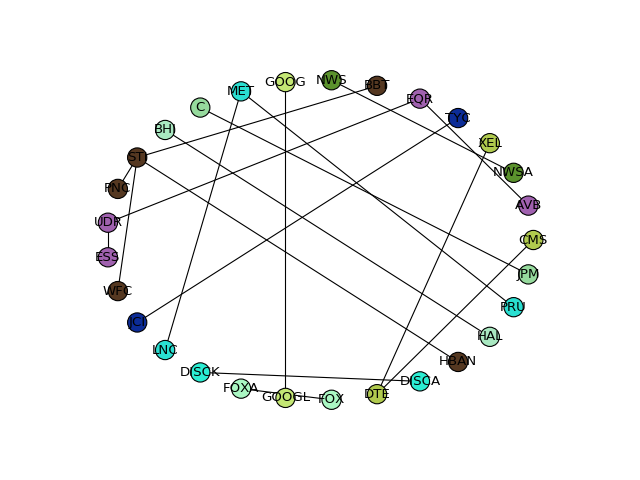

In [31]:
#Plot the graph  
%matplotlib notebook
nx.draw_shell(G, node_color=[z[node] for node in G] ,with_labels = True)
plt.show()   

*Another example for k=6, is illustrated below:

<IPython.core.display.Javascript object>


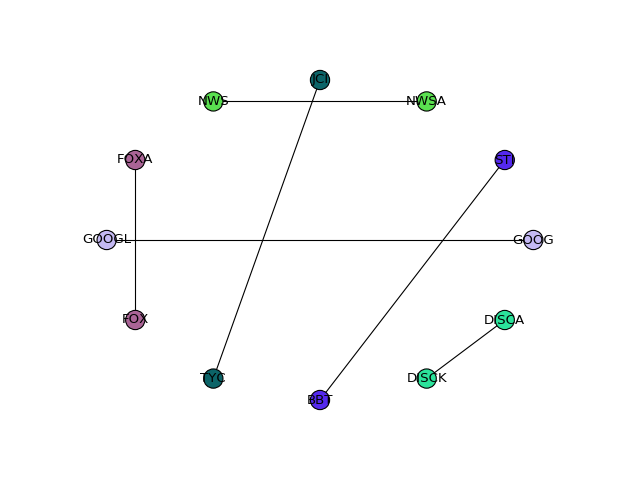

In [32]:
nodePointer,G=clustering(corrTable,6,correlationTable.columns)

#Recover the sets, creating a dictionary with indices of the clusters/sets as keys and nodes in each cluster as values of each element of the dictionary 
nodeList=clusterRecover(nodePointer) 

#Create a list of different colors of size n expressed in color codes
colors=get_spaced_colors(len(nodeList))

#Assign a color to each node based on each cluster
z=nodecoloring(nodeList,colors) #
 
#Plot the graph
%matplotlib notebook
nx.draw_shell(G, node_color=[z[node] for node in G] ,with_labels = True)
plt.show() 

* Finally, to test the results, the following script illustrates all the different clusters created by the algorithm for k=6

In [33]:
# test result
for i,j in nodeList.items():
    print("Cluster:",[k for k in j],":", [(compData.loc[k,'Name']) for k in j])
    

Cluster: ['HD'] : ['Home Depot']
Cluster: ['NKE'] : ['Nike']
Cluster: ['CMA'] : ['Comerica Inc.']
Cluster: ['CTSH'] : ['Cognizant Technology Solutions']
Cluster: ['ALB'] : ['Albemarle Corp']
Cluster: ['PHM'] : ['Pulte Homes Inc.']
Cluster: ['BRK-B'] : ['Berkshire Hathaway']
Cluster: ['DUK'] : ['Duke Energy']
Cluster: ['T'] : ['AT&T Inc']
Cluster: ['WMT'] : ['Wal-Mart Stores']
Cluster: ['XLNX'] : ['Xilinx Inc']
Cluster: ['AMZN'] : ['Amazon.com Inc']
Cluster: ['EQT'] : ['EQT Corporation']
Cluster: ['WFM'] : ['Whole Foods Market']
Cluster: ['BAX'] : ['Baxter International Inc.']
Cluster: ['VRSK'] : ['Verisk Analytics']
Cluster: ['AGN'] : ['Allergan plc']
Cluster: ['KEY'] : ['KeyCorp']
Cluster: ['PRU'] : ['Prudential Financial']
Cluster: ['RIG'] : ['Transocean']
Cluster: ['COH'] : ['Coach Inc.']
Cluster: ['CELG'] : ['Celgene Corp.']
Cluster: ['CSX'] : ['CSX Corp.']
Cluster: ['CF'] : ['CF Industries Holdings Inc']
Cluster: ['JCI', 'TYC'] : ['Johnson Controls', 'Tyco International']
Cluster:

ii. Discuss the results for dierent values of k.

* In order to understand how the algorithm performs regarding the number of clusters that it creates, for different values of k, one can refer to the following graph.

<IPython.core.display.Javascript object>


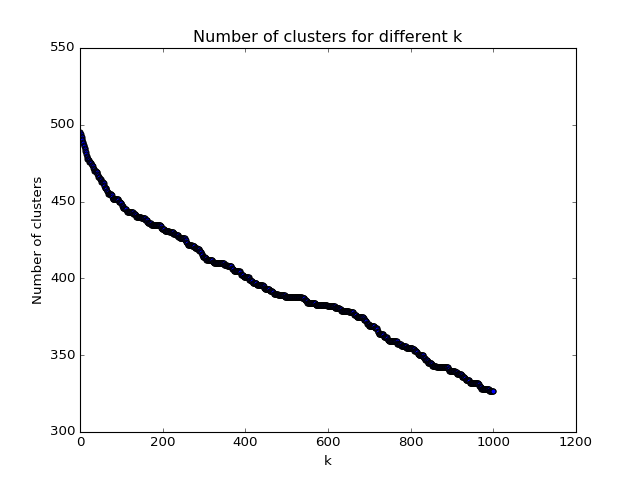

In [34]:
#Run clustering algorithm for different number of k's and store the number of clusters that were created for each k
x={}
for i in range (1,1000):
    nodePointer,G=clustering(corrTable,i,correlationTable.columns)
    nodeList=clusterRecover(nodePointer) 
    x[i]=len(nodeList)
    
%matplotlib notebook
#Plot the number of clusters for different k's
for k1,k2 in x.items():
   plt.scatter(k1,k2)


plt.title('Number of clusters for different k')
plt.xlabel('k')
plt.ylabel('Number of clusters')
plt.xlim(0,)
plt.show()

* It is clear that as the k increases, the number of cluster decreases. For small numbers of k, the majority of nodes in the graph constitute a single cluster. It is also interesting to notice that the rate of decrease in the number of clusters is low, as the number of k increases. This can be explained by the fact, that the graph is dense and every node in a specific cluster is possibly linked with the majority of the other nodes in the cluster, because of high weight/correlation values. 

iii.  Do some detective work: what is the greedy algorithm called? In what other graph problem is it often used? How are the problems related? 

* The greedy algorithm that was implemented above is called Kruskal's algorithm. Kruskal's algorithm, in general is an algorithm for finding minimum spanning trees, using a greedy approach. It approaches the problem, assuming that the graph is a forest and every node is an individual tree. Its tree is connected to another tree if and only if it had least cost among all available options. <sup>[1]</sup>

* In general, spanning trees algorithms, have applications in the design of networks, such as telecommunication, computer, transportation and electrical networks. For example, a telecommunication company that wants to connect a new neighborhood to its network, can use minimum spanning trees algorithms to minimize the total cost of the project. As the company is restricted to bury the cable only along certain paths, it can approach the problem as a graph, assuming that each path to a certain point is an edge of the graph. Its edge will have a different weight, depending on the length of the path or the difficulty of installation. A minimum spanning tree for that graph will be one that connects to every house in the neighborhood and has minimum cost. <sup>[2]</sup>

* Furthermore, spanning trees algorithms and specifically Kruskal's algorithm are often used for clustering problems. One interesting application of the algorithm is the automatic categorization of news, where the news are represented as nodes, and the edge between two nodes is the dissimilarity between the two different news. The algorithm builds k clusters, where the minimum dissimilarity between any two nodes in different clusters is the maximum possible.


----
References:

<sup>[1]</sup>: Asano, T.; Bhattacharya, B.; Keil, M.; Yao, F. (1988). Clustering algorithms based on minimum and maximum spanning trees. Fourth Annual Symposium on Computational Geometry (SCG '88). pp. 252–257. 


<sup>[2]</sup>:  Graham, R. L.; Hell, Pavol (1985), "On the history of the minimum spanning tree problem", Annals of the History of Computing, 7 (1): 43–57, MR 783327

iv. Do the resulting clusters make  sense?
 * In order to investigate if the resulting clusters make sense, a value of k=20 is used. 

In [35]:
nodePointer,G=clustering(corrTable,20,correlationTable.columns)
nodeList=clusterRecover(nodePointer) 
# test result
for i,j in nodeList.items():
    print("Cluster:",[k for k in j],":", [(compData.loc[k,'Name']) for k in j])
  

Cluster: ['HD'] : ['Home Depot']
Cluster: ['NKE'] : ['Nike']
Cluster: ['CMA'] : ['Comerica Inc.']
Cluster: ['CTSH'] : ['Cognizant Technology Solutions']
Cluster: ['ALB'] : ['Albemarle Corp']
Cluster: ['PHM'] : ['Pulte Homes Inc.']
Cluster: ['BRK-B'] : ['Berkshire Hathaway']
Cluster: ['DUK'] : ['Duke Energy']
Cluster: ['T'] : ['AT&T Inc']
Cluster: ['WMT'] : ['Wal-Mart Stores']
Cluster: ['XLNX'] : ['Xilinx Inc']
Cluster: ['AMZN'] : ['Amazon.com Inc']
Cluster: ['EQT'] : ['EQT Corporation']
Cluster: ['WFM'] : ['Whole Foods Market']
Cluster: ['BAX'] : ['Baxter International Inc.']
Cluster: ['VRSK'] : ['Verisk Analytics']
Cluster: ['AGN'] : ['Allergan plc']
Cluster: ['KEY'] : ['KeyCorp']
Cluster: ['RIG'] : ['Transocean']
Cluster: ['COH'] : ['Coach Inc.']
Cluster: ['CELG'] : ['Celgene Corp.']
Cluster: ['CSX'] : ['CSX Corp.']
Cluster: ['CF'] : ['CF Industries Holdings Inc']
Cluster: ['JCI', 'TYC'] : ['Johnson Controls', 'Tyco International']
Cluster: ['MU'] : ['Micron Technology']
Cluster: ['X

The algorithm created 478 clusters, with the majority of them being single node clusters. Clusters with more than one node are presented below:
1. 'Equity Residential', 'UDR Inc', 'Essex Property Trust Inc', 'AvalonBay Communities, Inc.'
2. 'CMS Energy', 'DTE Energy Co.', 'Xcel Energy Inc'
3. 'MetLife Inc.', 'Prudential Financial', 'Lincoln National'
4. 'Twenty-First Century Fox Class A', 'Twenty-First Century Fox Class B'
5. 'Huntington Bancshares', 'SunTrust Banks', 'PNC Financial Services', 'Wells Fargo', 'BB&T Corporation'
6. 'Discovery Communications-C', 'Discovery Communications-A'
7. 'Citigroup Inc.', 'JPMorgan Chase & Co.'
8. 'Alphabet Inc Class A', 'Alphabet Inc Class C'
9.  'Tyco International', 'Johnson Controls'
10. 'News Corp. Class B', 'News Corp. Class A'
11. 'Baker Hughes Inc', 'Halliburton Co.'


# Interpreting the above results

'Equity Residential', 'UDR Inc', 'Essex Property Trust Inc', 'AvalonBay Communities, Inc.' are all real estate investment trust (REIT) companies in United States, so they would perform similarly in the same market conditions. Hence, it makes clear sense, why they are in the same cluster

'CMS Energy', 'DTE Energy Co.', 'Xcel Energy Inc' are all major U.S. electricity and natural gas companies. As in the previous case, they would also perform similarly in the same market conditions

'Huntington Bancshares', 'SunTrust Banks', 'PNC Financial Services', 'Wells Fargo', 'BB&T Corporation' are all providers of banking, mortgage, investing, credit card, insurance, and consumer and commercial financial services


It is clear that clusters make total sense, as the majority of them are constituted from businesses, operating in the same industry in similar markets. As a consequence, their stock performance would be correlated, which explains why the algorithm would merge them in a single cluster. 

v. Verify that the stocks in your clusters perform similarly by plotting the returns and the (normalised) stock prices for some of the clusters.
* Returns of 'Equity Residential', 'UDR Inc', 'Essex Property Trust Inc', 'AvalonBay Communities, Inc.' 

<IPython.core.display.Javascript object>


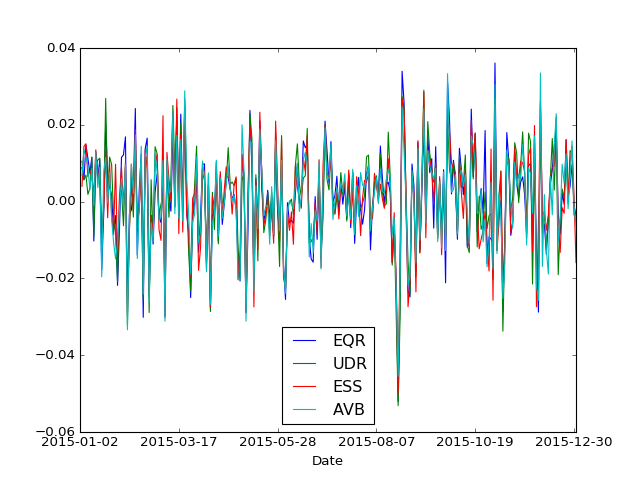

In [36]:
returns[['EQR', 'UDR', 'ESS', 'AVB']].plot()


In [37]:
priceData_norm = (priceData- priceData.mean()) / (priceData.max() - priceData.min())

* Normalised stock prices of  'Equity Residential', 'UDR Inc', 'Essex Property Trust Inc', 'AvalonBay Communities, Inc.' 

<IPython.core.display.Javascript object>


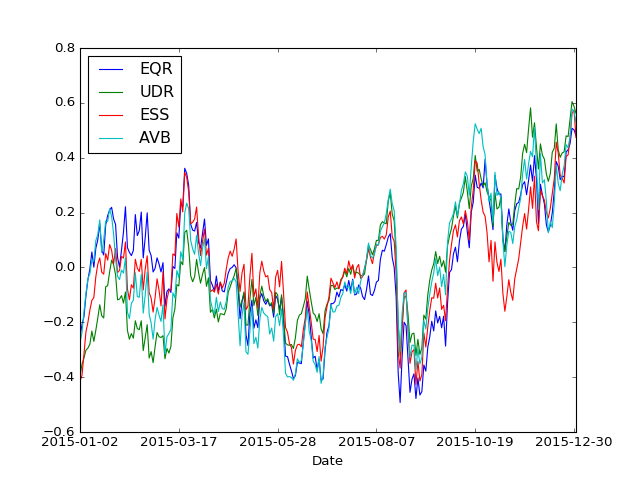

In [38]:
priceData_norm[['EQR', 'UDR', 'ESS', 'AVB']].plot()

* Returns of 'CMS Energy', 'DTE Energy Co.', 'Xcel Energy Inc'

<IPython.core.display.Javascript object>


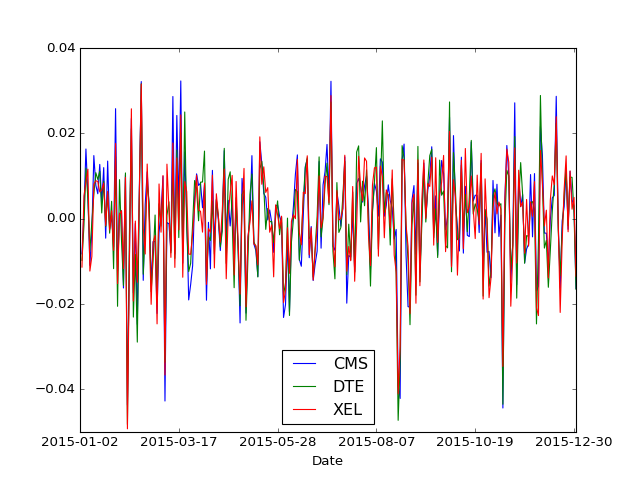

In [39]:
returns[['CMS', 'DTE', 'XEL']].plot()

* Normalised stock prices of  'CMS Energy', 'DTE Energy Co.', 'Xcel Energy Inc'

<IPython.core.display.Javascript object>


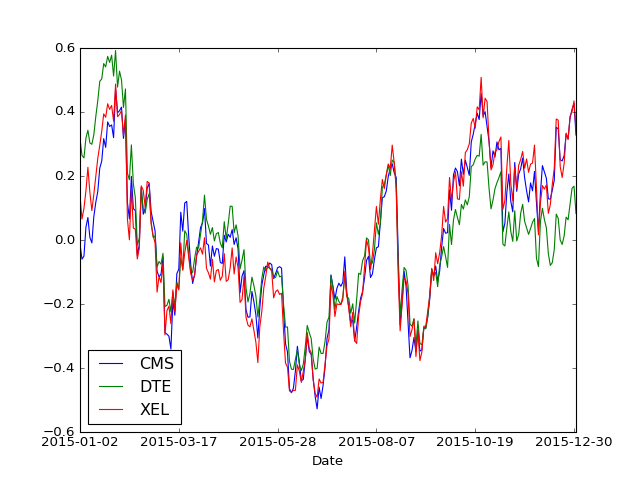

In [40]:
priceData_norm[['CMS', 'DTE', 'XEL']].plot()

* Returns of 'Huntington Bancshares', 'SunTrust Banks', 'PNC Financial Services', 'Wells Fargo', 'BB&T Corporation'

<IPython.core.display.Javascript object>


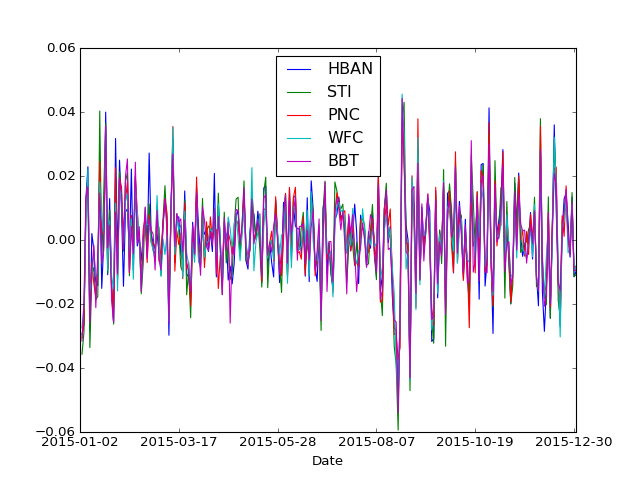

In [41]:
returns[['HBAN','STI', 'PNC', 'WFC', 'BBT']].plot()

* Normalised stock prices of  'Huntington Bancshares', 'SunTrust Banks', 'PNC Financial Services', 'Wells Fargo', 'BB&T Corporation'

<IPython.core.display.Javascript object>


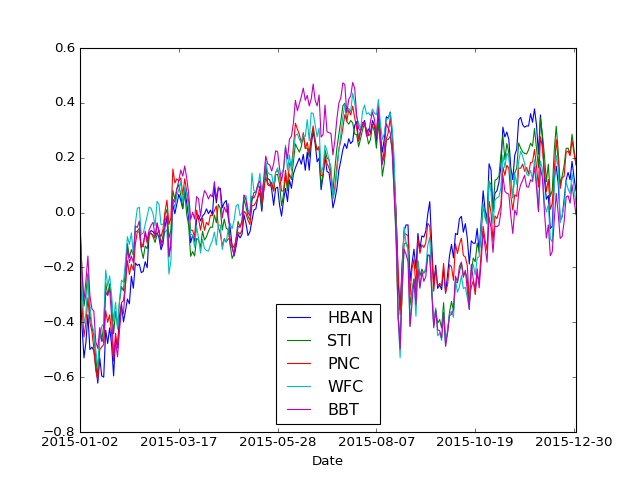

In [42]:
priceData_norm[['HBAN','STI', 'PNC', 'WFC', 'BBT']].plot()

Based on the above figures, it is clear that returns and stock prices of companies in the same cluster perform similarly during the time. 

<b><u> Part 4.1 (Extra part 1) </u></b>


<b>In-depth analysis</b>

The project is "open" in the sense that you can probably think of further interesting questions to look into based on returns, correlations, and clusters. This is not required but being creative and going further than the above questions will make your work stand out. You can explore one or several of the ideas below, or come up with questions of your own. Depending on your interests, you might look at different things. For example, when researching the algorithm, you might be interested in its complexity, and how to improve your implementation's efficiency. There is scope to go quite a bit deeper here. 

* Please refer to the more efficient code in the cell below.

Brief description of the algorithm<sup>[1]</sup>:  

* Used a list of n nodes, instead of a dictionary.  
  
  
* Each node has these properties:  
    + parent - stores the node's parent, similar to the described Part 3 algorithm. Nodes in the same tree belong to the same cluster  
    + rank - uses the rank of a node to merge trees. i.e. always merge a subtree with a lower rank root into a subtree with a higher rank root, and if both subtrees' roots are of same rank, then increase the rank of one subtree and merge the other subtree into this subtree.  
    + setlist - maintains a list of nodes that belong in the same cluster. the list is updated whenever trees/clusters are merged. This is to facilitate the recovery of the clusters after the algorithm has iterated k times. i.e. the root of the tree will always store the list of nodes in this cluster. When trying to obtain the cluster that node x belongs to, just return the list that Find(x), which is the root of x, has.


* MakeSet function
    + initialises each node's parent to itself (similar to the described algorithm for Part 3) 
    + initialise each node's rank to 0 (each node is a root [tree with only 1 node])
    
    
* Union function  
    + When merging node x and node y, find the root for node x and the root for node y (similar to the described algorithm for part 3)
    + While the described algorithm in Part 3 says "We then make one point to the other", here's what we do differently here. Instead of arbitrarily selecting one node to point to another node, we check the rank of x and y. We always make the smaller rank tree merge with the larger rank tree. In this way, we ensure that the depth of the tree will be O(log n), i.e. a balanced tree. If we arbitrarily select which node to point to another, we risk having a very long chain / linked list, that can be O(n).
    
    
* Find function
    + This function is called from the Union function, when finding the root of node x and node y.
    + This function basically starts from the starting node, and follow the node's parent, and that parent etc until we reach the root of the tree
    + What is different, is that as it transverses the chain, it sets the current node's parent, to the root of its parent (i.e. the root of the tree). This is path compression which makes subsequent Find (and hence Union), quicker.  
    
Discussion of efficiency:

* This should have better space efficiency as it uses a list rather than a dictionary. A dictionary / hash table, would typically have redundant space allocation in order to minimise collisions. Nonetheless, both would be O(n) space.


* In the original algorithm described in the assignment instructions, the time efficiency would be O(kn), because it performs k Union operations, and in each Union operation, the transversing of the chain via finding the root of the chain could be O(n) time (in the worst case, by arbitrarily linking trees, we could possibly land up with a long chain).  In the algorithm proposed, each transversal of the chain, the Find function, is O(log n), because we ensure that the tree is balanced. Hence each Union operation takes O(log n) time. So for k Union operations, it is O(k log n). Since k is at max the total number of edges, which is O(n^2) since the graph is dense, our algorithm is O(n^2 * log n) instead of O(n^3). Total number of edges = (n-1) + (n-2) + ... + 1 = O(n^2).


* But in fact, by using path compression and balanced trees, the amortized running time is actually O(k log\* n) as explained by Chang, 2014<sup>[2]</sup>, which can also be shown that it has a tighter bound O(k α(n)) where α(n) is the inverse Ackermann function. α(n) is less than 5 for all remotely practical values of n. Thus, the amortized running time per operation is effectively a small constant, which means the overall amortized efficiency is approximately O(k). log\* n is log log log ... log n, which is a very slow growing function.  The key reason for this is that with path compression, any calls to Find(x) or x's ancestors will return in constant time since x and its parents will all point to the root, after path compression. Chang's explanation uses the accounting method to explain amortized cost. He finds the upper bound of the cost of a first 'expensive' operation of Find(x), before path compression. The 'expensive' cost will help 'pay' for future operations of Find(x) after path compression. He then explains the tight upper bound of this cost and how many times this cost is incurred. The latter, on how many times cost is incurred, is dependent on the fact that trees are balanced. A tree of rank r+1 can only be achieved by linking two trees with roots of rank r. This then gives a max size of nodes that can ever achieve rank r, and this leads to the max number of expensive charges. In summary, the amortized cost of operations is thus lowered by using path compression and ensuring that trees are balanced.  


----
References:

<sup>[1]</sup>: Cormen, Thomas H.; Leiserson, Charles E.; Rivest, Ronald L.; Stein, Clifford (2001), "Chapter 21: Data structures for Disjoint Sets", Introduction to Algorithms (Second ed.), MIT Press, pp. 498–524.

<sup>[2]</sup>: Chang, R. (2014) Design & Analysis of Algorithms, Notes on Disjoint Set Union. [Lecture notes] University of Maryland Baltimore County. Available from: http://www.csee.umbc.edu/~chang/cs641.s08/dsu.pdf [Accessed: 13th October 2016].



In [43]:
##### START OF PART 4 part 1 - more efficient clustering algorithm #####

##~~ KEY VARIABLE: nodeList stores a list of Nodes, each node representing a stock price. Find(nodeList[i]).getSet()) will return the set of nodes that belong to the same cluster as nodeList[i]

##### Store all stock names into a list
all_stock_names = list(correlationTable.columns.values)
n = len(all_stock_names)

# COMMENT: The length of namesDict and all_stock_names 
#          DO NOT MATCH! all_stock_names is correct, 
#          there are 496 stock names in the price csv file
#          len(namesDict) shows 504, which matches 
#          the firms csv file
#          So the results differ because of the csv files.
#          To check that the usage of namesDict is correct.

##### Add all pairwise correlation (upper-triangle matrix), into a list
edge_list = []
for i in range(len(all_stock_names)-1):
    for j in range(i+1, len(all_stock_names)):
        # add tuple (weight, source, destination) to list
        edge_list.append( (correlationTable.loc[all_stock_names[i], all_stock_names[j]], i, j) )

# sort them in descending order
edge_list = sorted(edge_list, reverse = True)

##### Create a node class with:
#       node_name: prints the stock's name
#       parent: nodes with the same parent will belong to the same cluster
#       rank: depth of the node. Use this for efficient merging - tries to keep tree as balanced as possible - shorter search time
#       setlist: stores the names of all the nodes that belong to the same cluster. Updates this when sets are merged 
#                (the root of the tree at any time will always store the complete set of nodes belonging to the same cluster)

class Node():
    def __init__(self, node_name):
        self.name = node_name
        # maintain a list that stores all the nodes
        # in the same cluster. Update this list when
        # clusters merge (i.e. update the root node list)
        self.setlist = [node_name];
    
    def setParent(self, node):
        self.parent = node
        
    def getParent(self):
        return self.parent
        
    def setRank(self, rank):
        self.rank = rank

    def getRank(self):
        return self.rank
        
    def getSet(self):
        return self.setlist
        
    def mergeSet(self, node):
        # update the root node list whenever there is a merge operation. Root of the tree will have the complete set list
        node.getSet().extend(self.setlist)

    def __str__(self):
        return self.name
    

def MakeSet(x):
    x.setParent(x)
    x.setRank(0)
    
def Union(x, y):
    # Union in a way such that the depth of the tree is minimised
    # always add the shorter tree under the deeper tree so that the height doesn't increase
    xRoot = Find(x)
    yRoot = Find(y)
    if xRoot == yRoot:
        return

    # x and y are not already in same set. Merge them.
    # always merge the smaller subtree into the bigger one
    # to minimise the tree height
    if xRoot.getRank() < yRoot.getRank():
        xRoot.setParent(yRoot)
        xRoot.mergeSet(yRoot)
    elif xRoot.getRank() > yRoot.getRank():
        yRoot.setParent(xRoot)
        yRoot.mergeSet(xRoot)
    else:
        yRoot.setParent(xRoot)
        yRoot.mergeSet(xRoot)
        xRoot.setRank(xRoot.getRank() + 1)
        
def Find(x):
    # Path compression - whenever you're finding the root of a node, set the parent to the root directly
    if x.getParent() != x:
        x.setParent(Find(x.getParent()))
    return x.getParent()
    
def link_clusters(edge_list, node_names, k):
    # edge_list is list of sorted edges in tuple form (weight, source, destination)
    # node_names is the list of nodes' names
    # k is the number of iterations

    # get number of nodes
    n = len(node_names)
    
    # initialise nodePointers dictionary of linked nodes
    nodeList = []

    # add all the node names as Nodes into the list and init MakeSet (each node is a set of itself at the beginning)
    for i in range(n):
        nodeList.append(Node(node_names[i]))
        MakeSet(nodeList[i])        
        
    # loop this k times
    for i in range(k):
        # extract the k highest weights / correlations from the list
        # Negative correlated nodes should be nearer to the end of the list (i.e. stocks that are dissimiliar to each other, in opposite direction)
        # Negative weights should not affect the algorithm correctness
        weight, source, dest = edge_list[i]
        print(weight, source, dest) # for debugging purposes
        Union(nodeList[source], nodeList[dest])
        
    return nodeList
    
    
## UNCOMMENT THESE TO TEST ALGORITHM
## We have compared the results of this algorithm with Part 3's algorithm. The results match.

#nodeList = link_clusters(edge_list, all_stock_names, 99)

## print result
#for i in range(n):
#    print("Node", nodeList[i], "is in same set as Node ", Find(nodeList[i]), ". Cluster of nodes are:", Find(nodeList[i]).getSet())
    

##### END OF PART 4 part 1 #####

<b><u> Part 4.1 (Extra part 1) </u></b>




<b>Exploring other clustering methods</b>


Clustering of stock price data belongs to the category of time series clustering. Time series clustering algorithms partition data into groups based on similarity or distance, so that time series in the same cluster are similar. [7] Unfortunately, the majority of well-known machine learning and data mining algorithms are unsuitable for time series data, because of their high dimensionality, high feature correlation and large amount of noise [<sup>[1]</sup>-<sup>[3]</sup>]. 

The most well-known approaches used for time series clustering is hierarchical and partitioning algorithms. Hierarchical algorithms do not require prior knowledge of the number of clusters and they use a pairwise distance matrix to create a nested hierarchy of similar objects <sup>[4]</sup>. However, hierarchical algorithms are restricted to small datasets, as they don’t perform well with large quantities of data, because of their quadratic computational complexity <sup>[5]</sup>. Furthermore, partitioning algorithms like k-Means and k-Medoids algorithm are frequently used for time series data, even though they have a tendency to favor spherical clusters and the knowledge on the number of clusters is required in advance. Last but not least, model-based clustering approach creates a model for every cluster, determining the best data fir for that model. However, model based algorithms perform very slow and often lead to inaccurate clusters, due to parameters setting, which is based on user’s assumptions <sup>[6]</sup>. 

All the aforementioned approaches and algorithms require one basic step: ‘determine a suitable similarity/dissimilarity measure between two objects’ <sup>[8]</sup>, in order to partition time series into groups. Often similarity and dissimilarity is measured by comparing sequences of serial features of the original time series, like cross-correlations, autocorrelations, spectral features and wavelet coefficients. Some similarity measures include Euclidian distance, Pearson correlation, Dynamic Time Warping, short time series distance and many others.

Another one clustering algorithm was implemented in Python, using the scikit-learn library.  It is named Spectral Clustering and belongs to partitioning algorithms category. It clusters data that are connected but not necessarily compact or clustered within convex boundaries. Two of its main drawbacks are that the number of clusters must be known in advance and it performs well for a small number of clusters. In order to run the algorithm, an affinity matrix should be defined, which determines how close, or similar, two points are in space. When A(i,j)=0 the stocks perform totally similarly, and when A(i,j)=0 , the stocks have a totally different performance. In order to create the affinity matrix, a heat kernel is applied to transform the entries of the matrix. The resulted clusters differ dramatically in size. Some of them contain more than 100 nodes/companies, when other are single clusters or clusters with 2 nodes. The results of Spectral Clustering on the stock price data, using 30 clusters, are illustrated below. It is clear that even if some clusters are not meaningful because of their large size, smaller clusters are constituted from companies, which perform similar regarding their returns in time. 

----
References:

<sup>[1]</sup>: Keogh E, Kasetty S. On the need for time series data mining benchmarks: a survey and empirical demonstration. Data Mining and Knowledge Discovery. 2003;7(4):349–371.

<sup>[2]</sup>: Lin J, Vlachos M, Keogh E, Gunopulos D. Advances in Database Technology—EDBT 2004. 2004. Iterative incremental clustering of time series; pp. 106–122.

<sup>[3]</sup>: Rani S, Sikka G. Recent techniques of clustering of time series data: a survey. International Journal of Computational and Applied. 2012;52(15):1–9.

<sup>[4]</sup>: Vlachos M, Lin J, Keogh E. A wavelet-based anytime algorithm for k-means clustering of time series. Proceedings of the Workshop on Clustering High Dimensionality Data and Its Applications; 2003; pp. 23–30.

<sup>[5]</sup>: Wang X, Smith K, Hyndman R. Characteristic-based clustering for time series data. Data Mining and Knowledge Discovery. 2006;13(3):335–364.

<sup>[6]</sup>: Andreopoulos B, An A, Wang X, Schroeder M. A roadmap of clustering algorithms: finding a match for a biomedical application. Briefings in Bioinformatics. 2009;10(3):297–314. 

<sup>[7]</sup>: Saeed Aghabozorgi, Teh Ying-Wah, Hamid Jalab, Mohammad Amin Shayegan, and Alireza Jalali, A Hybrid Algorithm for Clustering of Time-series Data based on Affinity Search Technique,The Scientific World Journal, 2014 (ISI-Cited Publication)

<sup>[7]</sup>: P. Montero and J. A. Vilar. TSclust: An R package for time series clustering. Journal of Statistical Software, 62(1):1–43, 2014. [p1]








In [44]:
#Apply a heat map to the correlationTable
z=abs(1-abs(correlationTable))
z=np.matrix(z)
similarity = np.exp(-1 * z / z.std())
 
#Cluster Number
clustern=30

#Spectral clustering
cl = SpectralClustering(n_clusters=clustern,affinity='precomputed')
cl.fit(similarity)
clusters = cl.fit_predict(similarity)


#Recover the sets
nodeList3=dict([ (p, []) for p in range(0,clustern) ])
for i in range(0,len(clusters)):
    nodeList3[clusters[i]].append(correlationTable.columns[i])
    
# test result
for i,j in nodeList3.items():
    print("Cluster:",[k for k in j],":", [(compData.loc[k,'Name']) for k in j])
    
 

Cluster: ['BAC', 'BBT', 'SCHW', 'CMA', 'FITB', 'HBAN', 'KEY', 'MTB', 'PBCT', 'PNC', 'RF', 'STI', 'USB', 'WFC', 'ZION'] : ['Bank of America Corp', 'BB&T Corporation', 'Charles Schwab Corporation', 'Comerica Inc.', 'Fifth Third Bancorp', 'Huntington Bancshares', 'KeyCorp', 'M&T Bank Corp.', "People's United Financial", 'PNC Financial Services', 'Regions Financial Corp.', 'SunTrust Banks', 'U.S. Bancorp', 'Wells Fargo', 'Zions Bancorp']
Cluster: ['ABBV', 'AYI', 'AAP', 'AES', 'APD', 'ALB', 'AA', 'ALL', 'AXP', 'AMT', 'AMAT', 'ADM', 'T', 'ADSK', 'BLL', 'BAX', 'BBY', 'BIIB', 'HRB', 'BWA', 'BSX', 'COF', 'KMX', 'CBG', 'CBS', 'CNP', 'CTL', 'CERN', 'CF', 'CHK', 'CMG', 'CFG', 'COH', 'CMCSA', 'CAG', 'STZ', 'GLW', 'CCI', 'DRI', 'DVA', 'DE', 'DLR', 'DFS', 'DD', 'EMN', 'ECL', 'EMC', 'ENDP', 'EL', 'EXC', 'EXPE', 'ESRX', 'FFIV', 'FIS', 'FSLR', 'FE', 'FLIR', 'FMC', 'F', 'FCX', 'FTR', 'GRMN', 'GE', 'GM', 'GPN', 'GT', 'HBI', 'HOG', 'HAR', 'HRS', 'HAS', 'HOLX', 'HST', 'HPQ', 'HUM', 'ILMN', 'IR', 'IP', 'IFF'